<a href="https://colab.research.google.com/github/Ryo-Tanohata/sig_beginner9/blob/main/PyCaret_emsamble_beginner9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://openstandia.jp/oss_info/pycaret/

emsemble:https://qiita.com/tani_AI_Academy/items/62151d7e151024733919

#データの取得

In [1]:
#signate_begginer9.zipをGoogle Drive からひっぱってくるやつ
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
 
auth.authenticate_user()
 
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'signate_begginer9.zip'", fields="files(id)").execute()
signate_api_key = results.get('files', [])
 
filename = "/content/input/signate_begginer9.zip"
os.makedirs(os.path.dirname(filename), exist_ok=True)
 
request = drive_service.files().get_media(fileId=signate_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [2]:
import os
path="./input"
zip_files=os.listdir(path)
zip_files

['signate_begginer9.zip']

In [3]:
import zipfile
for i in zip_files:
    if ".zip" in i:
        with zipfile.ZipFile("input/"+i) as existing_zip:
            print(f'open {i}')
            existing_zip.extractall('input')
            print("extract")
    else:
        continue

open signate_begginer9.zip
extract


In [4]:
import os
datapath=[]
for dirname, dirpaths, filenames in os.walk('input'):
    for filename in filenames:
        datapath.append(dirname+'/'+filename)
datapath

['input/sample_submission.csv',
 'input/test.csv',
 'input/signate_begginer9.zip',
 'input/train.csv']

In [5]:
import pandas as pd
databox={}
for i in datapath:
    if '.tsv' in i:
        data={i.split('/')[1].split('.')[0]:pd.read_csv(i, sep='\t', index_col=0)}
    elif  ('train' in i) or ('test' in i):
        data={i.split('/')[1].split('.')[0]:pd.read_csv(i)}
    elif '.csv' in i:
        data={i.split('/')[1].split('.')[0]:pd.read_csv(i, header=None)}
    databox.update(data)
databox.keys()

dict_keys(['sample_submission', 'test', 'train'])

In [6]:
train=databox['train']
test=databox['test']
sub=databox['sample_submission']

In [ ]:
train.head()

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,target
0,0,56,1,5882,0,38,0,185315.0104,0.844417,134,1,0,10,1
1,3,50,0,1767,1,35,0,371620.3666,0.837448,136,0,0,187,1
2,7,41,0,250,1,30,0,372810.2084,0.819996,139,1,0,29,1
3,11,47,0,582,1,20,0,185780.6482,0.870314,137,0,0,43,0
4,12,60,0,80,0,25,0,265096.3999,0.828112,136,1,0,213,0


#PyCret

In [7]:
pip install -q pycaret

     |████████████████████████████████| 266kB 13.6MB/s 
     |████████████████████████████████| 245kB 20.0MB/s 
     |████████████████████████████████| 276kB 43.4MB/s 
     |████████████████████████████████| 14.2MB 349kB/s 
     |████████████████████████████████| 6.8MB 47.7MB/s 
     |████████████████████████████████| 2.0MB 31.0MB/s 
     |████████████████████████████████| 81kB 7.1MB/s 
     |████████████████████████████████| 215kB 51.6MB/s 
     |████████████████████████████████| 112kB 46.8MB/s 
     |████████████████████████████████| 61kB 5.0MB/s 
     |████████████████████████████████| 1.7MB 41.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 6.3MB/s 
     |████████████████████████████████| 1.1MB 47.2MB/s 
     |████████████████████████████████| 3.2MB 45.3MB/s 
     |████████████████████████████████| 81kB 7.5MB/s 

関数setup()にこのデータセットと目的変数のラベル名を与えると、データ型の推定と変換や欠損値の補填、カテゴリー変数のエンコーディングなどを自動的に行います。

In [8]:
from pycaret.classification import *
setup(data = train, target = 'target', session_id=123)

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1000, 14)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


(False,
        id  age  anaemia  creatinine_phosphokinase  ...  sex  smoking  time  target
 0       0   56        1                      5882  ...    1        0    10       1
 1       3   50        0                      1767  ...    0        0   187       1
 2       7   41        0                       250  ...    1        0    29       1
 3      11   47        0                       582  ...    0        0    43       0
 4      12   60        0                        80  ...    1        0   213       0
 ..    ...  ...      ...                       ...  ...  ...      ...   ...     ...
 995  1987   60        0                      2794  ...    1        0   213       0
 996  1988   50        1                        84  ...    1        0   213       0
 997  1994   51        1                        81  ...    1        0    63       0
 998  1996   76        1                       553  ...    1        0   115       1
 999  1998   50        0                      3964  ...    1        

そして、このようにデータの行数、特徴量の数、訓練データとテストデータの件数などを表示します。

関数compare_models()を呼び出すと、すべてのモデルを比較して、それぞれの精度を高い順に表示します。

In [9]:
best_model = compare_models(fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8470,0.8627,0.2940,0.8093,0.4233,0.3573,0.4215,0.524
lightgbm,Light Gradient Boosting Machine,0.8398,0.8468,0.4319,0.6468,0.4993,0.4112,0.4320,0.121
gbc,Gradient Boosting Classifier,0.8369,0.8504,0.3978,0.6369,0.4794,0.3909,0.4104,0.163
et,Extra Trees Classifier,0.8341,0.8667,0.2929,0.6926,0.3975,0.3216,0.3674,0.469
ada,Ada Boost Classifier,0.8098,0.7907,0.3533,0.5505,0.4127,0.3079,0.3274,0.124
ridge,Ridge Classifier,0.8083,0.0000,0.1104,0.5500,0.1777,0.1227,0.1748,0.022
qda,Quadratic Discriminant Analysis,0.8054,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.022
lr,Logistic Regression,0.8026,0.6496,0.0291,0.2333,0.0508,0.0272,0.0460,0.316
lda,Linear Discriminant Analysis,0.8011,0.7518,0.1841,0.4549,0.2567,0.1701,0.1932,0.021
dt,Decision Tree Classifier,0.7939,0.6690,0.4643,0.4787,0.4670,0.3410,0.3432,0.024


この関数は、モデルライブラリー内のすべてのモデルを学習し、メトリック評価のための層化交差検証を使用してそれらをスコアリングします。 出力は、学習時間とともに、精度、AUC、再現率、適合率、F1、Kappa、およびMCCを出力します。ここでは、LDAが最も高い精度を出したので、変数best_modelにはLDAのモデルオブジェクトが代入されます。

ハイパーパラメーターをチューニングするには、関数tune_model()を使用します。

In [10]:
rf = create_model('rf', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.8596,0.2308,1.0000,0.3750,0.3282,0.4431
1,0.8571,0.8266,0.3846,0.7143,0.5000,0.4253,0.4531
2,0.8286,0.8698,0.2308,0.6000,0.3333,0.2566,0.2955
3,0.8143,0.8584,0.2143,0.6000,0.3158,0.2353,0.2774
4,0.8857,0.9241,0.4286,1.0000,0.6000,0.5455,0.6124
5,0.8429,0.7679,0.3571,0.7143,0.4762,0.3956,0.4286
6,0.8429,0.9005,0.3571,0.7143,0.4762,0.3956,0.4286
7,0.8429,0.8929,0.2143,1.0000,0.3529,0.3038,0.4232
8,0.8286,0.8444,0.2143,0.7500,0.3333,0.2683,0.3385
9,0.8696,0.8826,0.3077,1.0000,0.4706,0.4191,0.5149


In [11]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)>

In [12]:
tuned_rf = tune_model(rf, optimize='Accuracy', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8000,0.7065,0.3077,0.4444,0.3636,0.2496,0.2556
1,0.8286,0.6606,0.3077,0.5714,0.4000,0.3103,0.3306
2,0.8143,0.8104,0.3846,0.5000,0.4348,0.3259,0.3299
3,0.8143,0.6945,0.2143,0.6000,0.3158,0.2353,0.2774
4,0.8143,0.8042,0.2857,0.5714,0.3810,0.2857,0.3095
5,0.8143,0.6186,0.4286,0.5455,0.4800,0.3689,0.3729
6,0.8000,0.6741,0.2857,0.5000,0.3636,0.2553,0.2694
7,0.8143,0.6652,0.0714,1.0000,0.1333,0.1096,0.2408
8,0.8143,0.6633,0.1429,0.6667,0.2353,0.1772,0.2469
9,0.8406,0.7788,0.2308,0.7500,0.3529,0.2900,0.3563


In [13]:
tuned_rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)>

In [14]:
lgbm = create_model('lightgbm')
xrf = create_model('rf')
ensemble = blend_models([lgbm, rf], fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.8664,0.2308,1.0000,0.3750,0.3282,0.4431
1,0.8429,0.8192,0.5385,0.5833,0.5600,0.4645,0.4651
2,0.8429,0.8691,0.3077,0.6667,0.4211,0.3441,0.3787
3,0.8143,0.8457,0.2857,0.5714,0.3810,0.2857,0.3095
4,0.9143,0.9554,0.6429,0.9000,0.7500,0.7000,0.7144
5,0.8286,0.7704,0.3571,0.6250,0.4545,0.3617,0.3817
6,0.8714,0.9082,0.5714,0.7273,0.6400,0.5631,0.5692
7,0.8857,0.9082,0.5714,0.8000,0.6667,0.6000,0.6124
8,0.8143,0.8265,0.2143,0.6000,0.3158,0.2353,0.2774
9,0.8696,0.8654,0.3077,1.0000,0.4706,0.4191,0.5149


In [16]:
stack = stack_models(estimator_list = [rf], meta_model = lgbm, fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8714,0.8327,0.3077,1.0000,0.4706,0.4199,0.5155
1,0.8143,0.8016,0.6154,0.5000,0.5517,0.4362,0.4399
2,0.8571,0.8570,0.4615,0.6667,0.5455,0.4640,0.4751
3,0.8286,0.8023,0.3571,0.6250,0.4545,0.3617,0.3817
4,0.8286,0.9094,0.6429,0.5625,0.6000,0.4915,0.4933
5,0.8286,0.7487,0.5000,0.5833,0.5385,0.4340,0.4359
6,0.8857,0.9069,0.8571,0.6667,0.7500,0.6774,0.6864
7,0.8714,0.9222,0.5000,0.7778,0.6087,0.5361,0.5548
8,0.8286,0.8112,0.5000,0.5833,0.5385,0.4340,0.4359
9,0.8841,0.8613,0.4615,0.8571,0.6000,0.5392,0.5746


In [17]:
stack = stack_models(estimator_list = [lgbm], meta_model = rf, fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8714,0.8583,0.3077,1.0000,0.4706,0.4199,0.5155
1,0.8571,0.8144,0.5385,0.6364,0.5833,0.4978,0.5004
2,0.8714,0.8772,0.4615,0.7500,0.5714,0.5008,0.5212
3,0.8143,0.8482,0.2143,0.6000,0.3158,0.2353,0.2774
4,0.8857,0.9177,0.5714,0.8000,0.6667,0.6000,0.6124
5,0.8143,0.7774,0.4286,0.5455,0.4800,0.3689,0.3729
6,0.8571,0.9101,0.5000,0.7000,0.5833,0.5000,0.5103
7,0.8714,0.8903,0.5000,0.7778,0.6087,0.5361,0.5548
8,0.8143,0.8622,0.2857,0.5714,0.3810,0.2857,0.3095
9,0.8696,0.8633,0.3077,1.0000,0.4706,0.4191,0.5149


この関数は、ランダムグリッドサーチを使用してモデルのハイパーパラメーターを自動的に調整します。出力は、モデルの最高の精度、AUC、再現率、適合率、F1、kappa、およびMCCを出力します。

PyCaretは主要なグラフの表示も簡単にできます。例えば、ROC曲線は以下のようなコードで表示できます。

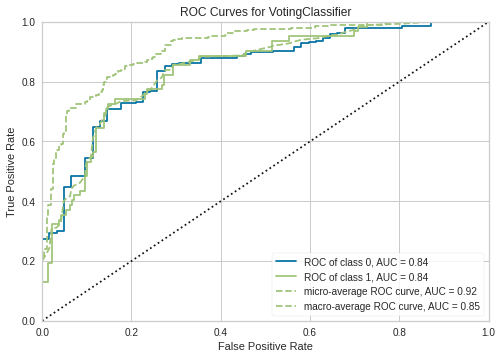

In [27]:
plot_model(ensemble, plot = 'auc')

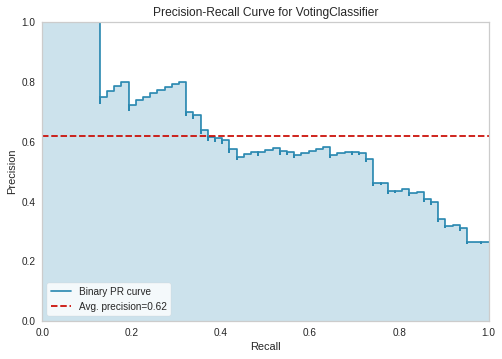

In [26]:
plot_model(ensemble, plot = 'pr')

In [25]:
plot_model(ensemble, plot='feature')

TypeError: ignored

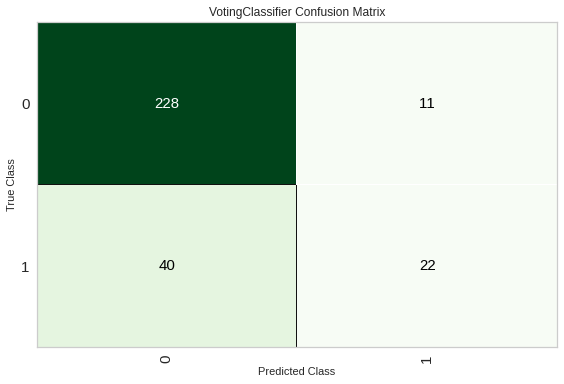

In [24]:
plot_model(ensemble, plot = 'confusion_matrix')

In [20]:
predict_model(ensemble)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8306,0.8446,0.3548,0.6667,0.4632,0.3735,0.3997


,id,age,creatinine_phosphokinase,platelets,serum_creatinine,serum_sodium,time,anaemia_1,diabetes_1,ejection_fraction_14,ejection_fraction_15,ejection_fraction_17,ejection_fraction_20,ejection_fraction_25,ejection_fraction_30,ejection_fraction_35,ejection_fraction_38,ejection_fraction_40,ejection_fraction_45,ejection_fraction_50,ejection_fraction_60,ejection_fraction_70,high_blood_pressure_1,sex_0,smoking_0,target,Label,Score
0,256.0,41.0,96.0,814355.56250,0.809539,132.0,278.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.9198
1,392.0,71.0,582.0,260788.78125,0.903504,134.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0,0.8892
2,104.0,67.0,2442.0,216399.03125,0.883098,140.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.5706
3,1171.0,79.0,212.0,274520.37500,0.826170,134.0,257.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.8017
4,275.0,78.0,582.0,265458.03125,1.442968,140.0,205.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1,0,0.7607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1198.0,42.0,582.0,271058.03125,1.485246,130.0,245.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1,0.8514
297,909.0,40.0,582.0,260200.28125,0.944879,136.0,245.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.8743
298,1172.0,50.0,167.0,347376.40625,0.863861,140.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9786
299,346.0,50.0,66.0,349191.46875,0.822619,138.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9298


In [21]:
predictions = predict_model(ensemble, data=test)

In [22]:
predictions

,id,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Label,Score
0,1,67,1,56,0,60,0,255844.0310,0.824480,140,0,0,147,0,0.8283
1,2,58,0,320,0,38,0,163434.8513,5.281481,134,0,0,207,1,0.6583
2,4,67,1,737,0,60,0,255278.8436,0.841388,140,0,0,113,0,0.7376
3,5,48,0,231,1,60,0,500149.7955,0.742807,139,1,1,215,0,0.8446
4,6,59,0,320,0,35,0,245489.2530,1.082861,132,1,0,215,0,0.8482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1992,52,1,582,0,45,1,272303.4409,0.840646,136,1,0,209,0,0.9396
996,1993,51,0,130,1,35,0,270252.4419,0.858651,136,0,0,186,0,0.9514
997,1995,59,0,132,0,38,0,271631.9731,0.880883,141,1,0,33,0,0.8344
998,1997,61,0,582,0,60,0,265879.0010,0.932744,139,1,0,207,0,0.8843
